**TRUNCATED HYPERBOLIC MOTION**

Suppose the acceleration does not extend all the way back to t = - $∞$ but begins at time t<sub>0</sub> = -αb/c (for some α > 0), when the particle was at
  $ z(t_{0}) = b\sqrt{1+α^2} $ <br>
  and its velocity was
  $ v =-αc/\sqrt{1+\alpha^2} \hat{z}$ <br>
prior to t<sub>0</sub> the velocity was constant. <br>
In simple words, z(t) becomes:<br>
$ z(t) = (b - \alpha*ct)/\sqrt{1+\alpha^2} \enspace\enspace\enspace (for\enspace t < t_{0} = -\alpha*b/c) $ \\
$ z(t) = \sqrt{b^2 + (ct)^2} \enspace\enspace\enspace (for\enspace t >= t_{0}) $


At time t = 0, for all points **outside** a sphere of radius r = -ct<sub>0</sub> = $\alpha$*b, centered at z(t<sub>0</sub>), the field is that of a charge moving at a constant velocity, had it continued on its original flight plan (b/$\sqrt{1+\alpha^2}$): <br>


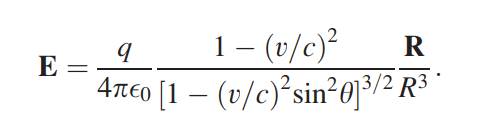

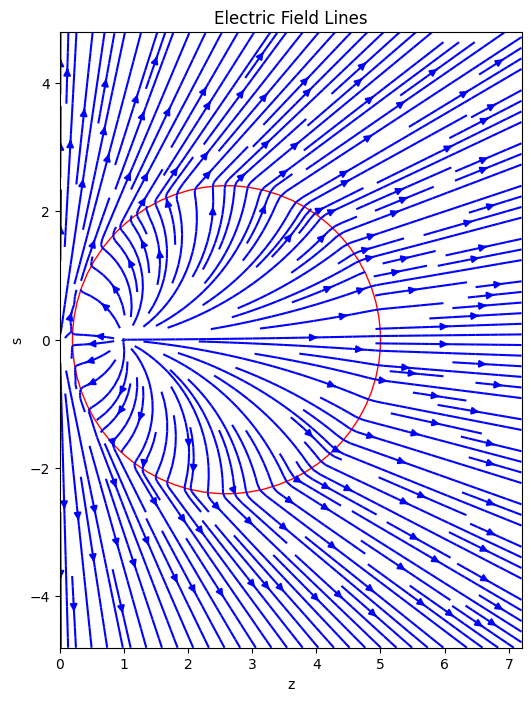

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
alpha = 12/5
b = 1
c = 1

# Define radius of the circle
radius = alpha * b / c

# Define range of z and s values
z_vals = np.linspace(0.01, 3*radius, 100)
s_vals = np.linspace(-2*radius, 2*radius, 100)

# Create meshgrid
Z, S = np.meshgrid(z_vals, s_vals)

# Calculate distance from the center of the circle
distance = np.sqrt((Z - b*np.sqrt(1 + alpha**2))**2 + S**2)

# Mask to keep electric field inside the circle
mask = distance <= radius
mask2 = distance > radius

# Calculate electric field components
E_z = np.zeros_like(Z)
E_s = np.zeros_like(S)

E_z[mask] = (Z[mask]**2 - S[mask]**2 - b**2) / np.sqrt((Z[mask]**2 + S[mask]**2 + b**2)**2 - (2*Z[mask]*b)**2)**3
E_s[mask] = 2*Z[mask]*S[mask] / np.sqrt((Z[mask]**2 + S[mask]**2 + b**2)**2 - (2*Z[mask]*b)**2)**3


# Define constants
q = 1  # Charge
epsilon_0 = 1  # Vacuum permittivity
beta = 0.8  # Velocity of charge in units of the speed of light

# Calculate electric field components in the xy-plane
R = np.sqrt(S[mask2]**2 + Z[mask2]**2)
theta = np.arctan2(S[mask2], Z[mask2])
E_z[mask2] = q / (4*np.pi*epsilon_0) * (1 - beta**2) / ((1 - beta**2 * np.sin(theta)**2)**(3/2)) * Z[mask2] / R**3
E_s[mask2] = q / (4*np.pi*epsilon_0) * (1 - beta**2) / ((1 - beta**2 * np.sin(theta)**2)**(3/2)) * S[mask2] / R**3

# Plot electric field lines
plt.figure(figsize=(8, 8))
plt.streamplot(Z, S, E_z, E_s, color='b', density=2)
plt.xlabel('z')
plt.ylabel('s')
plt.title('Electric Field Lines')
# Draw the circle
circle = plt.Circle((b * np.sqrt(1 + alpha**2), 0), radius, color='r', fill=False)
plt.gca().add_artist(circle)

plt.xlim(0, 3*radius)
plt.ylim(-2*radius, 2*radius)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


The left edge of the spere is at $(\sqrt{1+\alpha^2} - \alpha)b$ (which is always positive, but goes to zero as $\alpha$ tends to ∞). Inside the sphere, where news of the acceleration has been received, the field is given by the following equation:


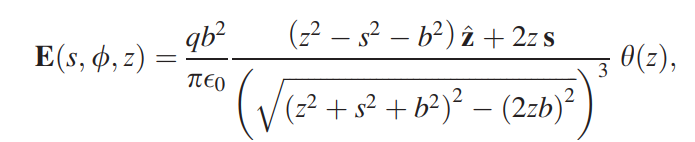

The field lines evidently join up in a thin layer at the surface of the sphere, representing the brief interval during which the motion switches from uniform to hyperbolic.

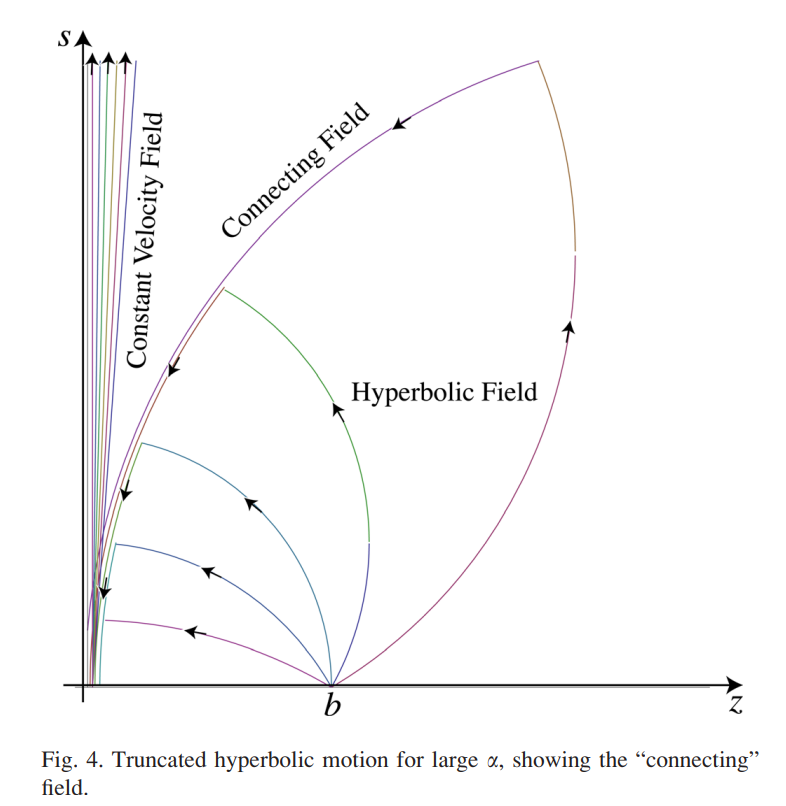

As $\alpha$ increases (that is, as t<sub>0</sub> recedes into the more distant past), the radius of the sphere increases, and its left surface flattens out against the xy-plane. Meanwhile, the "outside" field compresses into a disk perpendicular to the motion, and squeezes also onto the xy-plane. The complete field lines now execute a 90<sup>o</sup> turn at z = 0, as required to rescue Gauss's law. Indeed, for $\alpha$ tending to $\infty$ the constant velocity portion of the field approaches that of a point charge moving at speed c:

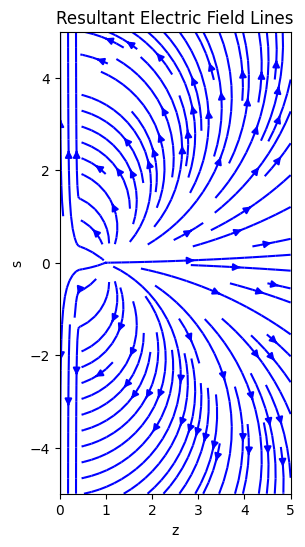

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
b = 1

# Define range of z and s values (considering z > 0)
z_vals = np.linspace(0.01, 5, 100)
s_vals = np.linspace(-5, 5, 100)

# Create meshgrid
Z, S = np.meshgrid(z_vals, s_vals)

# Calculate electric field components
E_z = (Z**2 - S**2 - b**2) / np.sqrt((Z**2 + S**2 + b**2)**2 - (2*Z*b)**2)**3
E_s = 2*Z*S / np.sqrt((Z**2 + S**2 + b**2)**2 - (2*Z*b)**2)**3 + (S / (S**2 + b**2)) * (Z < 0.4) * 5

# Calculate magnitude and direction of resultant electric field
E_mag = np.sqrt(E_z**2 + E_s**2)
E_dir = np.arctan2(E_s, E_z)

# Calculate components of the resultant electric field
E_res_z = E_mag * np.cos(E_dir)
E_res_s = E_mag * np.sin(E_dir)

# Plot electric field lines
plt.figure(figsize=(8, 6))
plt.streamplot(Z, S, E_res_z, E_res_s, color='b')
plt.xlabel('z')
plt.ylabel('s')
plt.title('Resultant Electric Field Lines')
plt.xlim(0, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


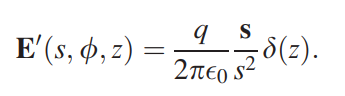

But this is not what was neede to cancel the flux from the hyperbolic part of the field. For that purpose the field on the xy-plane should have been :

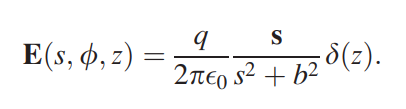

It must be that the "connecting" field in the spherical shell (the field produced during the transition from uniform to hyperbolic motion), which (in limit) coincides with the xy-plane and which we have ignored, accounts for the difference. The net field in the xy-plane consists of two parts: the field **E**' due to the portion of the motion at constant velocity, given (in the limit $\alpha$ tending to $\infty$) by the eq:

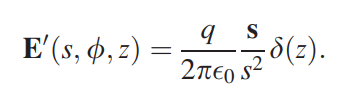

and the connecting field that joints it to the hyperbolic part. It is the sum of these fields that gieves the actual field. The true field of a charge in hyperbolic motion is evidently :

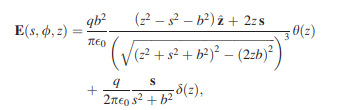

As a check, let's calculate the divergence of **E**. Writing **E** = **E**<sub>0</sub>θ(z) + **E**<sub>δ</sub>, we have

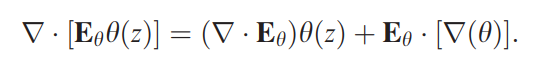

The first term gives ρ/ϵ<sub>0</sub>, for the point charge q at z = b; as for the second term,

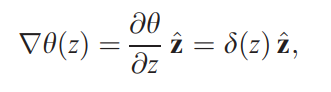

so

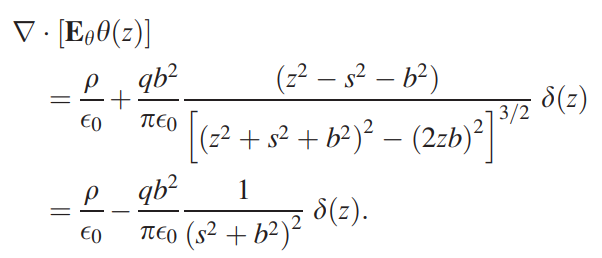

And

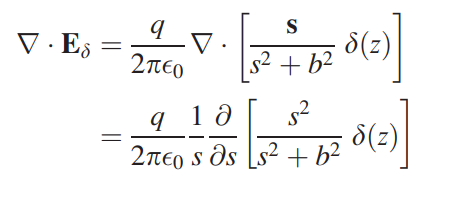

So

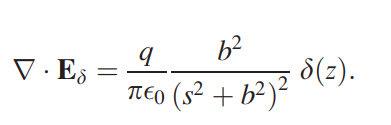

This is just right to cancel the extra term in $\nabla$.[**E**<sub>θ</sub>θ(z)], and Gauss's law is sustained:


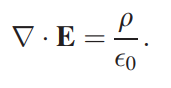